In [39]:
# 📱 SMS Spam Classifier: Detecting Unwanted Messages with Machine Learning

# A simple yet effective machine learning project that classifies SMS messages as SPAM or NOT SPAM using text preprocessing,
# Bag of Words, and models like NAIVE BAYES and LOGISTIC REGRESSION.  



      label                                            message
0  Not Spam  Go until jurong point, crazy.. Available only ...
1  Not Spam                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3  Not Spam  U dun say so early hor... U c already then say...
4  Not Spam  Nah I don't think he goes to usf, he lives aro...

Labels count:
 label
Not Spam    4825
spam         747
Name: count, dtype: int64
Naive Bayes Accuracy: 0.9838565022421525
Logistic Regression Accuracy: 0.97847533632287

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Classification Report (Logistic Regression):
               precision    recall  f1-s

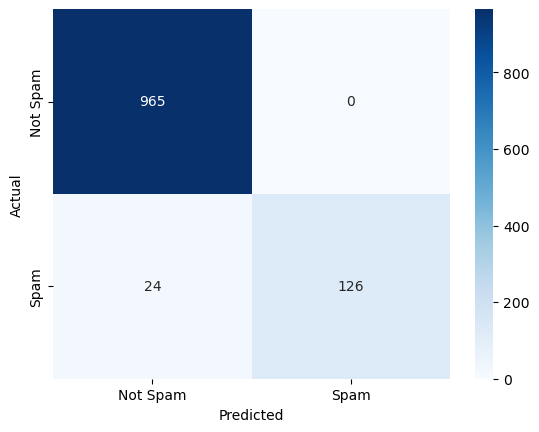

Message: 'You have won a free iPhone! Claim now!!!' → Spam
Message: 'Hey, are we meeting for lunch tomorrow?' → Not Spam
Message: 'Free entry in 2 lucky draws just for you!' → Not Spam


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading CSV file 
data = pd.read_csv("spam.csv", encoding='latin-1')

# Keeping only useful columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

data['label'] = data['label'].replace({'ham': 'Not Spam'})

print(data.head())
print("\nLabels count:\n", data['label'].value_counts())

# Converting 'ham' → 0, 'spam' → 1
data['label_num'] = data['label'].map({'Not Spam':0, 'spam':1})

X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label_num'], 
    test_size=0.2, random_state=42
)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Using Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Using Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

# Using Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

messages = [
    "You have won a free iPhone! Claim now!!!",
    "Hey, are we meeting for lunch tomorrow?",
    "Free entry in 2 lucky draws just for you!"
]

pred = lr.predict(vectorizer.transform(messages))

for msg, p in zip(messages, pred):
    if p == 1:  # For Spam
        print(f"Message: '{msg}' → \033[91mSpam\033[0m")   
    else:       # For Not Spam
        print(f"Message: '{msg}' → \033[92mNot Spam\033[0m") 
